<a href="https://colab.research.google.com/github/virb30/fraud-detection/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Ainda que se queira reduzir a quantidade de falsos positivos, é preferível (tanto para instituição financeira quanto para o consumidor) que hajam falsos positivos a falsos negativos (que representam prejuízos para ambos).

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

O objetivo desse projeto é comparar dois modelos de Machine Learning utilizados para classificação e verificar qual deles se comporta melhor e em qual cenário. Também iremos comparar o desempenho do mesmo modelo treinado com os mesmos dados balanceados de maneira diferente entre si, para verificar qual técnica é melhor aplicada a determinado modelo nesse contexto.

In [2]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [12]:
file_path = "https://www.dropbox.com/s/7z9o7tgit89ihbn/creditcard.csv?dl=1"
# importar os dados para um dataframe
df = pd.read_csv(file_path)

# verificando dimensões do dataset
print(f"Dimensões do dataset original:\t{df.shape}")

Dimensões do dataset original:	(284807, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Antes de partirmos para a construção do nosso modelo, como o modelo CRISP-DM sugere, vamos começar compreendendo nossos dados. Para isso, vamos à Análise Exploratória:

## Análise Exploratória

Vamos começar nossa análise visualizando as 5 primeiras e 5 últimas entradas do *dataset*


In [ ]:
# ver primeiras entradas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# ver as últimas entradas do dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Visualizando os dados, podemos perceber que as variáveis `Time` e `Amount` possuem seus valores originais.

Também vemos que o dataset passou por uma transformação prévia (PCA) de modo a descaracterizar as variáveis deixando-as anônimas, isso é marcado pela presença das variáveis numéricas (V1-V28), as quais não temos mais detalhes.

Em seguida vamos visualizar um resumo estatístico do *dataframe* utilizando o 
método `describe()`.

In [ ]:
# exibir um resumo do dataset
print(f"Entradas:\t{df.shape[0]}")
print(f"Variáveis:\t{df.shape[1]}\n\n")
df.describe()

Entradas:	284807
Variáveis:	31




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Pelo resumo estatístico notamos que as váriaveis resultantes do PCA (V1-V28) não possuem discrepâncias aparentes. O mesmo ocorre com a variável `Time`. 

Vale o adendo que, segundo a documentação a variável `Time` representa a quantidade em segundos entre a transação e a primeira transação do *dataset*, ou seja, a última transação ocorreu 172.792 segundos (ou 2 dias) após o primeiro registro no dataset.

Vemos também que o valor médio das transações foi de 88.34, mediana de 22.00 e desvio padrão de 250.12. Também notamos que o valor máximo atingido foi de 25691.16. No entanto, como esperado, a maioria das transações apresentaram quantias menores.



### Criando um conjunto de teste

Vamos extrair um subconjunto de dados a partir do dataframe original. Esse conjunto será utilizado para testar nosso modelo. Uma recomendação geral é que o modelo só tenha conhecimento desses dados após treinado e validado, assim conseguimos simular uma situação real onde o modelo deverá classificar dados novos/desconhecidos.

In [ ]:
# criar um conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# remover exemplos de teste do dataset original
df = df.drop(test.index)

# verificar dimensões dos conjuntos
print(f'Dimensões do dataset de teste:\t{test.shape}')
print(f'Novas Dimensões do dataset:\t{df.shape}')

Dimensões do dataset de teste:	(42721, 31)
Novas Dimensões do dataset:	(242086, 31)


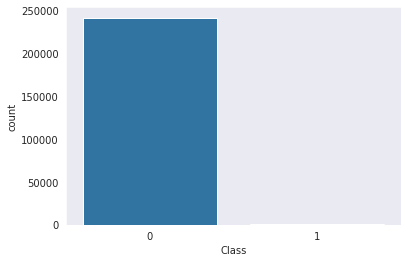

In [ ]:
# visualizar balanceamento do dataset
sns.countplot(x='Class', data=df)

O gráfico acima deixa claro o desbalanceamento do *dataset*, com apenas 0,17% do total de registros sendo classificados como fraude.

Portanto será necessário balancearmos os dados antes de treinar nosso modelo de classificação.

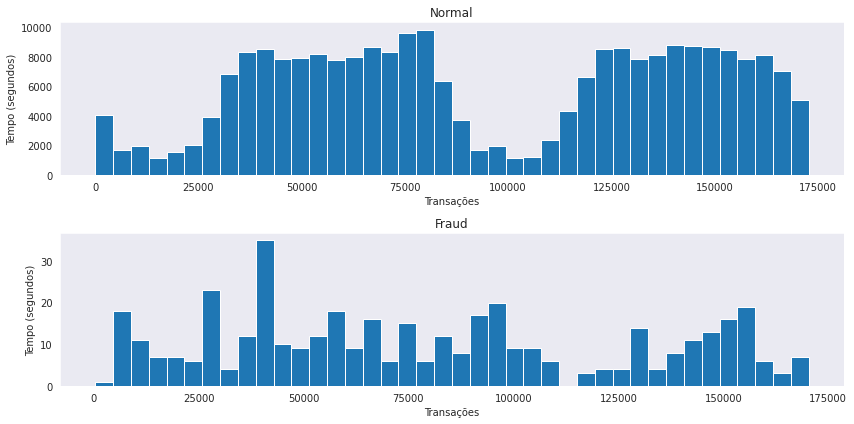

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraud')

ax[0].set_ylabel('Tempo (segundos)')
ax[0].set_xlabel('Transações')

ax[1].set_ylabel('Tempo (segundos)')
ax[1].set_xlabel('Transações')

plt.tight_layout()

Comparando as distribuições das duas classe na variável `Time`, não conseguimos identificar nenhuma informação relevante.



Vamos ver como fica essa distribuição com relação à coluna ***Amount***, para essa coluna iremos ainda plotar um boxplot para vermos se há algum padrão nas transações.

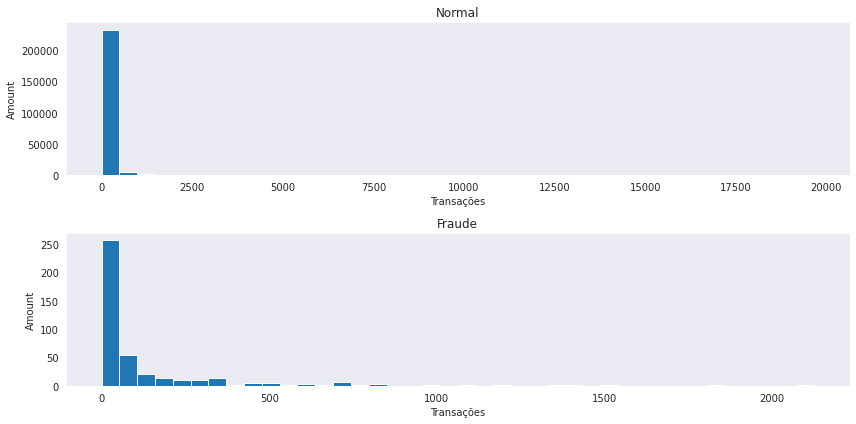

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

ax[0].set_ylabel('Amount')
ax[0].set_xlabel('Transações')

ax[1].set_ylabel('Amount')
ax[1].set_xlabel('Transações')
plt.tight_layout()

Pelos histogramas acima, vemos algumas discrepâncias na distribuição da variável `Amount` com relação a quantidade de transações, notamos a presença de um outlier (a transação de 25691), também percebemos que a maior transação fraudulenta encontrada foi num valor próximo a 300.

Também vemos que as transações fraudulentas concentram-se em valores menores, muito provavelmente para evitar os mecanismos de detecção.

Seguindo nossa análise, vamos ver como ficam os boxplots para a variável `Amount`

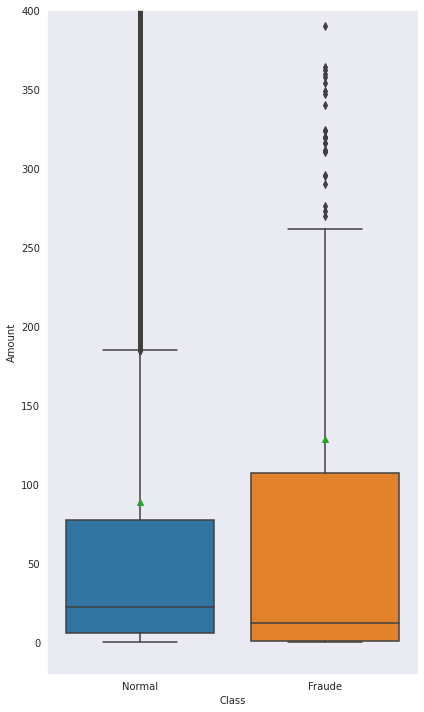

In [ ]:
# plotar boxplot
fig, ax = plt.subplots(figsize=(6, 10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

O BoxPlot acima nos revela uma distribuição diferente entre as classess.

Vamos verificar o resumo estatístico da variável `Amount` dos dados classificados como fraude.

In [ ]:
# resumo estatístico da variável Amount
df[(df.Class == 1)]['Amount'].describe()

count     418.000000
mean      128.496722
std       267.731154
min         0.000000
25%         1.000000
50%        11.855000
75%       106.812500
max      2125.870000
Name: Amount, dtype: float64

Vemos que a média é 122.21 e o maior valor 2125.87, também vemos que a mediana é 9.25, isso nos mostra que a maioria das transações classificadas como fraude possuem valores entre 1 e 105.89.

Vamos analisar pelos gráficos de densidade, se conseguimos mais informações que nos indiquem quais das variáveis poderão ser melhores para treinarmos nosso modelo.

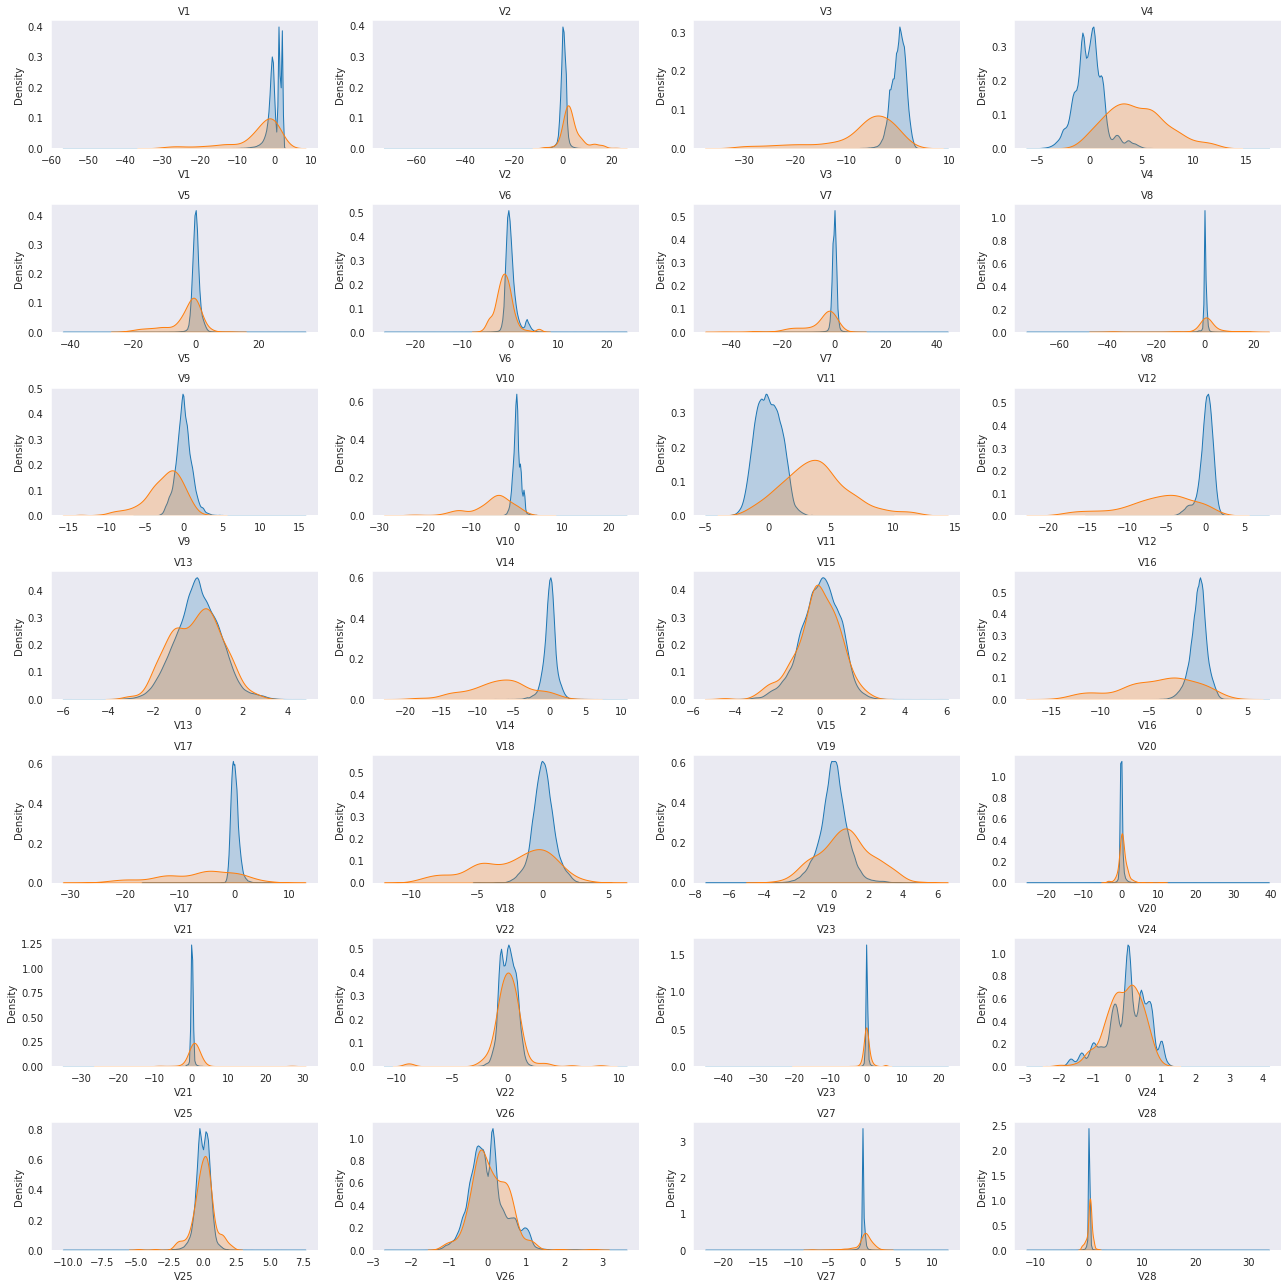

In [ ]:
# remover colunas
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

# separar dataframe em dataframe normal e dataframe fraud
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

# plotar gráficos de densidades para todas as variáveis
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

for idx, col in enumerate(column_names):
    plt.subplot(7, 4, idx + 1)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Nesse tipo de representação buscamos encontrar anomalias, ou seja, as variáveis que são diferentes entre as classes, assim temos uma maior chance de detectar fraudes. Nesses gráficos, notamos que:

1. As variáveis `V3`, `V4`, `V10`, `V11`, `V12` e `V14` são bem diferentes
2. Enquanto as variáveis `V13`, `V15`, `V25` e `V28` são bem semelhantes.


Agora que conhecemos um pouco mais sobre os dados, vamos à prepará-los para treinar nosso modelo.

## Preparação dos Dados

Na etapa de preparação dos dados precisamos:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados para evitar baixa performance e *overfitting*

### Padronizar `Time` e `Amount`

Para evitar problemas com escalas diferentes durante o treinamento do nosso modelo, iremos padronizar as variáveis que não estão na mesma escala das demais, no caso as variáveis `Time` e `Amount`. Como `Amount` possui *outliers* utilizaremos o `StandardScaler`.

In [ ]:
# importar standard scaler
from sklearn.preprocessing import StandardScaler

# copiar dataframe
df_clean = df.copy()

# instanciar standard scaler
scaler = StandardScaler()

# criar colunas time e amount padronizadas
df_clean['time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))
df_clean['amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))

# remover colunas antigas
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver 5 primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,time,amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.997399,0.246341
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.997399,-0.346945
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.997378,1.171178
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.997378,0.140872
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.997357,-0.075195


### Dividir entre conjuntos de treino e validação

Antes de balancearmos o conjunto de dados, iremos dividir os conjuntos em treino e validação, para que possamos validar se o balanceamento foi feito corretamente.

Para que os conjuntos de treino e validação tenham a mesma quantidade de classes proporcionalmente, passaremos para nossas classes o parâmetro `stratify`

In [ ]:
# importar pacotes necessários
from sklearn.model_selection import train_test_split

# Remover coluna alvo
X = df_clean.drop('Class', axis=1)
y = df_clean.Class

# dividir os conjuntos
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

In [ ]:
# Visualizar dados de treino e validação
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(181564, 30)
(181564,)
(60522, 30)
(60522,)


### Balanceamento dos Dados

Como vimos durante a análise exploratória, nosso conjunto de dados está muito desbalanceado (apenas 0.17% dos dados estão classificados como fraude), isso pode prejudicar o treinamento nosso modelo. O balanceamento tem como objetivo equalizar as quantidades de exemplos para cada variável alvo.

Podemos balancear os dados de duas maneiras:
1. *under-sampling*: removem-se os registros da classe majoritária.
2. *over-sampling*: adicionam-se registros da classe minoritária.

Realizaremos o balanceamento com ambas as técnicas a fim de termos um comparativo de desempenho para ambos os casos. Utilizaremos as classe `RandomUnderSampler` e `RandomOverSampler` ambas da biblioteca `imblearn` que realizam o balanceamento selecionando exemplos de maneira aleatória.

In [ ]:
# importar pacotes necessários
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler()
ros = RandomOverSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)
X_ros, y_ros = ros.fit_sample(X_train, y_train)

Os dados balanceados ficaram divididos da seguinte forma:

* *Under-sampling*: 313 registros de cada classe
* *Over-sampling*: 181251 registros de cada classe

Comparando os gráficos de distribuição das classes dos dados balanceados com o mesmo gráfico dos dados originais (que pode ser visto no início dessa análise), vemos que, agora, temos a mesma quantidade de registros para cada classe.

Vale ressaltar ainda que o cenário mais próximo do real é para os dados balanceados com a técnica de *under-sampling* uma vez que utiliza-se apenas dos dados reais, e não de dados "fabricados", no entanto, para efeitos comparativos iremos utilizar ambos para treinar nossos modelos e ver qual deles tem melhor desempenho.

Under sampling:
1    313
0    313
dtype: int64

Over sampling:
1    181251
0    181251
dtype: int64



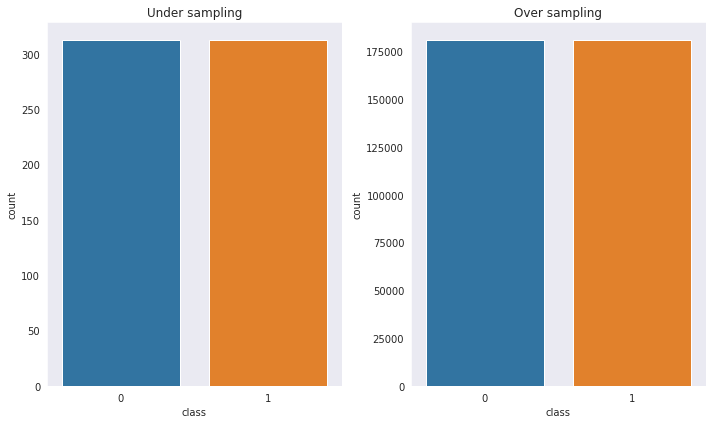

In [ ]:
# ver quantidade de registros de cada classe
print(f'Under sampling:\n{pd.Series(y_rus).value_counts()}')
print(f'\nOver sampling:\n{pd.Series(y_ros).value_counts()}\n')

# visualizar balanceamento do dataset atualizado
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax[0].set_xlabel('class')
ax[1].set_xlabel('class')

ax[0].set_ylabel('examples')
ax[1].set_ylabel('examples')

ax[0].set_title('Under sampling')
ax[1].set_title('Over sampling')

sns.countplot(y_rus, ax=ax[0])
sns.countplot(y_ros, ax=ax[1])


plt.tight_layout()

### Correlação

Antes de iniciarmos a construção dos nossos modelos, vamos ver como era e como ficou a relação entre as variáveis através de uma matriz de correlação, lembrando que quanto mais próximo de vermelho mais forte a correlação positiva e quanto mais próximo do azul escuro mais forte a correlação negativa.

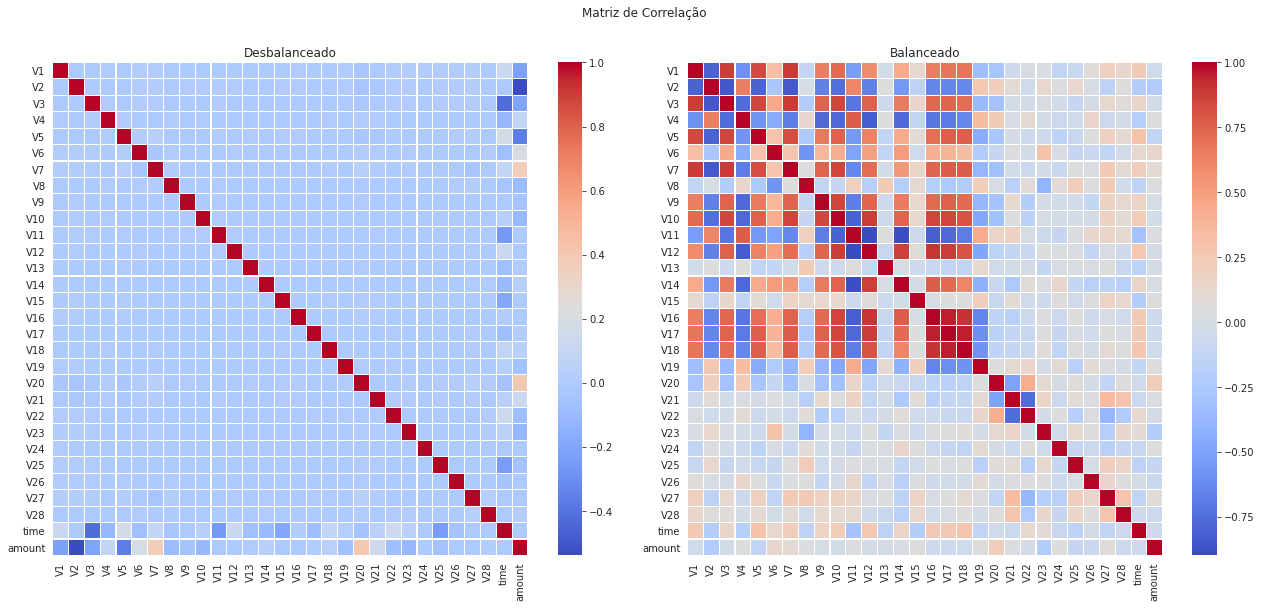

In [ ]:
# matriz de correlação dos dados originais
corr = X_train.corr()

# correlação dos dados balanceados
corr_rus = pd.DataFrame(X_rus).corr()

# plotar matriz de correlação
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação', y=1.05)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.tight_layout()

Como os dados originais estavam desbalanceados, vemos que a matriz de correlação para esses dados (gráfico da esquerda) não nos revela muita informação, uma vez que indica que quase nenhuma variável está correlacionada.

No entanto, após o balanceamento (gráfico da direita) fica evidente a relação das variáveis, como exemplo podemos citar a relação entre as variáveis `V3` e `V1`.

## Modelo de Machine Learning

Com os dados balanceados podemos seguir com a construção dos nossos modelos de Machine Learning. Como estamos lidando com um problema de classificação binária (ou seja o alvo pode assumir apenas 2 valores - 0 ou 1) iremos realizar um comparativo entre dois modelos: regressão logística e árvores de decisão.

Iremos treinar cada modelo da seguinte maneira: utilizando os dados originais, balanceados com *under-sampling* e balanceados com *over-sampling* e comparar os resultados.

Em seguida iremos comparar os modelos entre si para avaliar qual tem o melhor desempenho.

**NOTA:** nesse momento não nos preocuparemos com o *tunning* dos parâmetros do modelo.

### Modelo de Regressão Logística

Por se utilizar da função sigmoide $\frac{1}{1+e^{-z}}$, o modelo de regressão logística mapeia os valores no intervalo [0, 1], sendo um dos mais utilizados para problemas de classificação binária (por exemplo: classificação de spam ou fraude).

Começando com os dados originais:

In [ ]:
# Treinamento do modelo com dados originais

# 1. importar modelo
from sklearn.linear_model import LogisticRegression

# 2. instanciar modelo e escolher hiperparametros
model_reg_ori = LogisticRegression()

# 3. separar os dados entre featrure matrix e target
X_reg_ori = X_train
y_reg_ori = y_train

# 4. treinar modelo
model_reg_ori.fit(X_reg_ori, y_reg_ori)

# 5. fazer previsões em cima dos dados de validação
y_pred_reg_ori = model_reg_ori.predict(X_val)
y_proba_reg_ori = model_reg_ori.predict_proba(X_val)

Em seguida vamos treinar o modelo utilizando os dados balanceados utilizando o método de *under-sampling*.

Iremos criar uma nova instância do modelo para evitar quaisquer vazamentos do treinamento anterior.

In [ ]:
# 2. instanciar modelo e escolher hiperparametros
model_reg_rus = LogisticRegression()

# 3. separar os dados entre featrure matrix e target
X_reg_rus = X_rus
y_reg_rus = y_rus

# 4. treinar modelo
model_reg_rus.fit(X_reg_rus, y_reg_rus)

# 5. fazer previsões em cima dos dados de validação
y_pred_reg_rus = model_reg_rus.predict(X_val)
y_proba_reg_rus = model_reg_rus.predict_proba(X_val)

Por fim iremos treinar o modelo de regressão utilizando os dados balanceados utilizando o método de *over-sampling*.

In [ ]:
# 2. instanciar modelo e escolher hiperparametros
model_reg_ros = LogisticRegression()

# 3. separar os dados entre featrure matrix e target
X_reg_ros = X_ros
y_reg_ros = y_ros

# 4. treinar modelo
model_reg_ros.fit(X_reg_ros, y_reg_ros)

# 5. fazer previsões em cima dos dados de validação
y_pred_reg_ros = model_reg_ros.predict(X_val)
y_proba_reg_ros = model_reg_ros.predict_proba(X_val)

#### Avaliando o modelo

No modelo de `Regressão Logística` utilizamos, como métrica de avaliação de desempenho, os indicadores de `precision`, `recall` e `f1-score`. Essas métricas são obtidas através da função `classification_report` disponível no `sklearn`.

A `precision` nos diz a quantidade proporcional de identificações positivas feitas corretamente, ou seja, dentre as previsões marcadas **positivo**, qual foi o percentual de acerto do algoritmo. Obtido pela equação: 

$$\frac{TP}{TP+FP}$$

O `recall` nos diz a proporção de positivos encontrado corretamente, ou seja, dos dados **reais positivos**, qual proporção deles foi realmente marcado como positivo, e é dado pela equação: 

$$\frac{TP}{TP+FN}$$

O `F1-score` é a média harmônica entre `precision` e `recall`e nos dá uma boa ideia do desempenho do nosso algoritmo. É obtido pela equação: 

$${2}\cdot{\frac{precision \cdot recall}{precision+recall}}$$

Onde:
* TP = true positive (previsões positivas corretas)
* FP = false positive (previsões positivas incorretas)
* FN = false negative (previsões negativas incorretas)
* TN = true negative (previsões negativas corretas)

Outra métrica interessante, e que indiretamente utiliza-se dos conceitos acima abordados é a *AUC ROC*. Vamos começar definindo essas métricas:

* *ROC* ou *Receiver Operation Characteristic* traça uma curva baseada nas taxas de verdadeiro positivo e falso positivo.
* *AUC* ou *Area Under the Curve* é uma métrica que traduz a curva *ROC* em um número através do cálculo, como o nome sugere, da área sob a curva *ROC*.

Agora que definimos nossas métricas, vamos ver qual foi o desempenho de cada um dos nossos modelos.

Relatório de classificação:
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     60417
           1     0.8841    0.5810    0.7011       105

    accuracy                         0.9991     60522
   macro avg     0.9417    0.7904    0.8504     60522
weighted avg     0.9991    0.9991    0.9991     60522

AUC ROC: 0.7904



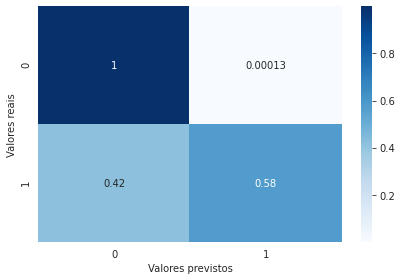

In [ ]:
# importando pacotes necessários
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score

# avaliando o desempenho do modelo treinado com dataset original
print(f'Relatório de classificação:\n{classification_report(y_val, y_pred_reg_ori, digits=4)}')

# avaliando AUC do modelo
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_reg_ori)))

# matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_val, y_pred_reg_ori, normalize='true'), cmap='Blues', annot=True, ax=ax)

ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")

plt.tight_layout()

Apesar de nosso modelo indicar uma acurácia de 99%, vemos pela matriz de confusão que nosso modelo classificou corretamente apenas 62% das transações fraudulentas enquanto que 38% das transações legítimas foram classificadas como fraude.

A seguir vamos avaliar o desempenho do modelo treinado com os dados balanceados utilizando a técnica de *under-sampling*.

Relatório de classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9728    0.9861     60417
           1     0.0540    0.8952    0.1019       105

    accuracy                         0.9726     60522
   macro avg     0.5269    0.9340    0.5440     60522
weighted avg     0.9982    0.9726    0.9846     60522

AUC ROC: 0.9340



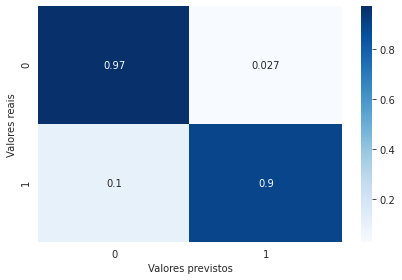

In [ ]:
# avaliando o desempenho do modelo treinado com dataset balanceado com random under sampler
print(f'Relatório de classificação:\n{classification_report(y_val, y_pred_reg_rus, digits=4)}')

# avaliando AUC do modelo
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_reg_rus)))

# matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_val, y_pred_reg_rus, normalize='true'), cmap='Blues', annot=True, ax=ax)

ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")

plt.tight_layout()

Como era de se esperar, acurácia global diminuiu (de 99,9% para 95,73%), agora utilizamos dados balanceados, sendo assim reduzimos o overfitting que nosso primeiro modelo tinha, principalmente com relação às transações legítimas - que possuiam muito mais registros do que fraudes. Em contrapartida nosso índice AUC ROC aumentou considerávelmente, saltando de 80,95% para 93,11%.

Essa melhora pode ser vista na matriz de confusão em que nosso modelo passou a identificar corretamente 96% das transações legítimas e 90% das transações fraudulentas, assim os números de falsos positivos e falsos negativos caíram para 9,5% e 4,3% respectivamente.

Para efeitos de comparação, vamos avaliar o mesmo modelo treinado com dados balanceados pelo método *over-sampling*

Relatório de classificação:
              precision    recall  f1-score   support

           0     0.9998    0.9766    0.9881     60417
           1     0.0611    0.8762    0.1143       105

    accuracy                         0.9764     60522
   macro avg     0.5305    0.9264    0.5512     60522
weighted avg     0.9982    0.9764    0.9865     60522

AUC ROC: 0.9264



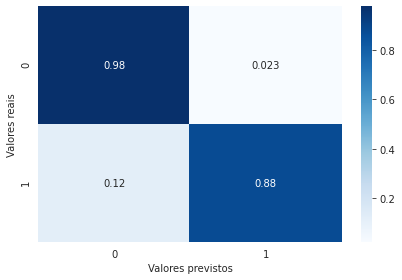

In [ ]:
# avaliando o desempenho do modelo treinado com dataset balanceado com random over sampler
print(f'Relatório de classificação:\n{classification_report(y_val, y_pred_reg_ros, digits=4)}')

# avaliando AUC do modelo
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_reg_ros)))

# matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_val, y_pred_reg_ros, normalize='true'), cmap='Blues', annot=True, ax=ax)

ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")

plt.tight_layout()

Podemos notar que o modelo treinado com dados balanceados com *over-sampling* apresentaram resultados ainda melhores que o último: 97,61% de acurácia global e AUC ROC de 95%.

Mais uma vez vemos uma melhora considerável nas detecções - e consequente redução no número de falsos negativos e falsos positivos, em resumo, nosso modelo de regressão logística com dados balanceados utilizando *over-sampling* apresentou:

* aumento na detecção correta de transações legítimas 98%;
* aumento na detecção correta de transações fraudulentas 92%
* redução no número de falsos positivos 7,6% e;
* redução no número de falsos negativos 2,4%.

### Modelo de Árvore de Decisão

Conforme dissemos no início dessa seção, iremos realizar um comparativo entre dois algoritmos diferentes para que possamos avaliar qual deles se sai melhor com nosso conjunto de dados.

As etapas serão as mesmas utilizadas no modelo de regressão a começar pelo treinamento do modelo utilizando os dados originais:




In [ ]:
# importar pacotes necessários
from sklearn.tree import DecisionTreeClassifier

# 1. instanciar modelo
model_tree_ori = DecisionTreeClassifier('entropy')

# 3. separar os dados entre featrure matrix e target
X_tree_ori = X_train
y_tree_ori = y_train

# 4. treinar modelo
model_tree_ori.fit(X_tree_ori, y_tree_ori)

# 5. fazer previsões em cima dos dados de validação
y_pred_tree_ori = model_tree_ori.predict(X_val)
y_proba_tree_ori = model_tree_ori.predict_proba(X_val)

Seguindo com os dados balanceados com *under-sampling*:

In [ ]:
# 1. instanciar modelo
model_tree_rus = DecisionTreeClassifier('entropy')

# 3. separar os dados entre featrure matrix e target
X_tree_rus = X_rus
y_tree_rus = y_rus

# 4. treinar modelo
model_tree_rus.fit(X_tree_rus, y_tree_rus)

# 5. fazer previsões sobre dos dados de validação
y_pred_tree_rus = model_tree_rus.predict(X_val)
y_proba_tree_rus = model_tree_rus.predict_proba(X_val)

E por fim os dados balanceados com *over-sampling*:

In [ ]:
# 1. instanciar modelo
model_tree_ros = DecisionTreeClassifier('entropy')

# 3. separar os dados entre featrure matrix e target
X_tree_ros = X_ros
y_tree_ros = y_ros

# 4. treinar modelo
model_tree_ros.fit(X_tree_ros, y_tree_ros)

# 5. fazer previsões sobre dos dados de validação
y_pred_tree_ros = model_tree_ros.predict(X_val)
y_proba_tree_ros = model_tree_ros.predict_proba(X_val)

#### Avaliando o modelo

Como o algoritmo de árvore de decisão também trata de classificações, utilizaremos as mesmas métricas para avaliar o desempenho do modelo.

Começando pelo modelo treinado com o *dataset* original (desbalanceado):





Relatório de classificação:
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     60417
           1     0.7778    0.8000    0.7887       105

    accuracy                         0.9993     60522
   macro avg     0.8887    0.8998    0.8942     60522
weighted avg     0.9993    0.9993    0.9993     60522

AUC ROC: 0.8998



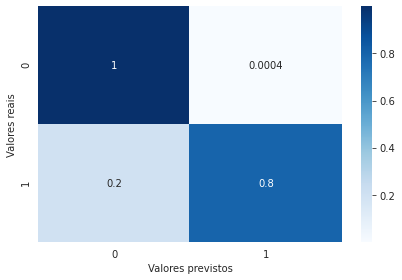

In [ ]:
# avaliando o desempenho do modelo treinado com dataset original
print(f'Relatório de classificação:\n{classification_report(y_val, y_pred_tree_ori, digits=4)}')

# avaliando AUC do modelo
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_tree_ori)))

# matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_val, y_pred_tree_ori, normalize='true'), cmap='Blues', annot=True, ax=ax)

ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")

plt.tight_layout()

Notamos o mesmo comportamento que vimos no modelo de regressão: acurácia global de 99,9% porém AUC ROC de 87,59%.

Ainda que com um desempenho ligeiramente superior que o modelo de regressão logística, o modelo de árvore de decisão apresentou resultados semelhantes quando analisamos os números de detecções de fraude feitas corretamente (75%) e falsos positivos (25%).

Vamos analisar o desempenho desse mesmo modelo quando utilizamos os dados balanceados com *under-sampling*.

Relatório de classificação:
              precision    recall  f1-score   support

           0     0.9998    0.8803    0.9363     60417
           1     0.0132    0.9238    0.0261       105

    accuracy                         0.8804     60522
   macro avg     0.5065    0.9021    0.4812     60522
weighted avg     0.9981    0.8804    0.9347     60522

AUC ROC: 0.9021



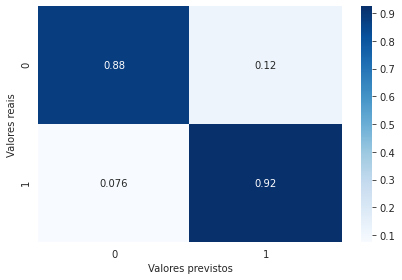

In [ ]:
# avaliando o desempenho do modelo treinado com dataset balanceado com under sampling
print(f'Relatório de classificação:\n{classification_report(y_val, y_pred_tree_rus, digits=4)}')

# avaliando AUC do modelo
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_tree_rus)))

# matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_val, y_pred_tree_rus, normalize='true'), cmap='Blues', annot=True, ax=ax)

ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")

plt.tight_layout()

Com os dados balanceados utilizando a técnica de *under-sampling* notamos uma melhora significativa se compararmos com o mesmo modelo treinado com dados desbalanceados. Em resumo temos:

* melhora do índice AUC ROC - de 87,59% para 90,88%;
* melhora nas detecções de falsos positivos - de 25%;
* melhora nas detecções de transações fraudulentas - de 75% para 94%;

Como era de se esperar notamos uma ligeira piora na detecção de transações legítimas (de aproximadamente 100% para 87%) e também na detecção de falsos negativos (de 0,05% para 13%). Esse comportamento era esperado pois, com dados desbalanceados tinhamos maior quantidade de transações, consequentemente o modelo estava otimizado para detectar transações legítimas.

Por fim vamos avaliar o desempenho de um modelo de árvore de decisão com dados balanceados pela técnica de *over-sampling*.

Relatório de classificação:
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     60417
           1     0.7636    0.8000    0.7814       105

    accuracy                         0.9992     60522
   macro avg     0.8816    0.8998    0.8905     60522
weighted avg     0.9992    0.9992    0.9992     60522

AUC ROC: 0.8998



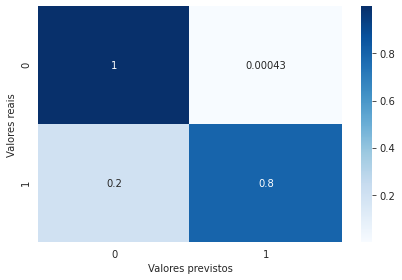

In [ ]:
# avaliando o desempenho do modelo treinado com dataset balanceado com under sampling
print(f'Relatório de classificação:\n{classification_report(y_val, y_pred_tree_ros, digits=4)}')

# avaliando AUC do modelo
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_tree_ros)))

# matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_val, y_pred_tree_ros, normalize='true'), cmap='Blues', annot=True, ax=ax)

ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")

plt.tight_layout()

Diferente do que vimos anteriormente, o desempenho do modelo piorou quando utilizamos dados balanceados utilizando o método *over-sampling*.

* o AUC ROC caiu para 87,13%;
* a taxa de detecções falso positivas aumentou de 25 para 25%;
* a taxa de transações fraudulentas classificadas corretamente caiu de 75% para 74%.

### Realizando previsões em nosso conjunto de testes

Após analisarmos o desempenho dos modelos, vamos utilizar o que apresentou os melhores resultados (`modelo_reg_ros`) para realizar previsões no conjunto de testes (os quais o modelo não teve contato) para validarmos se nosso modelo está genérico o suficiente, ou se temos um modelo muito específico (*overfitting*).

Primeiro precisaremos fazer alguns tratamentos no nosso conjunto de testes, de modo a normalizá-lo (semelhante ao que fizemos com o conjunto de treino/validação.

In [ ]:
# copiar dataframe
test_clean = test.copy()

# instanciar standard scaler
scaler = StandardScaler()

# criar colunas time e amount padronizadas
test_clean['time'] = scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))
test_clean['amount'] = scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))

# remover colunas antigas
test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver 5 primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,time,amount
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,0.658372,-0.177738
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,1.320094,-0.321945
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,1.219742,0.034666
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,-0.919236,0.838765
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-1.572827,-0.310490


Com o conjunto de testes normalizado vamos separar X e Y para que possamos realizar as previsões.

In [ ]:
# separar X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test_clean['Class']

In [ ]:
# fazer previsões
y_pred_test = model_reg_ros.predict(X_test)
y_proba_test = model_reg_ros.predict_proba(X_test)

Por fim vamos ver o desempenho do nosso modelo para dados desconhecidos.

Relatório de classificação:
              precision    recall  f1-score   support

           0     0.9999    0.9773    0.9885     42647
           1     0.0676    0.9459    0.1261        74

    accuracy                         0.9773     42721
   macro avg     0.5337    0.9616    0.5573     42721
weighted avg     0.9983    0.9773    0.9870     42721

AUC ROC: 0.9616



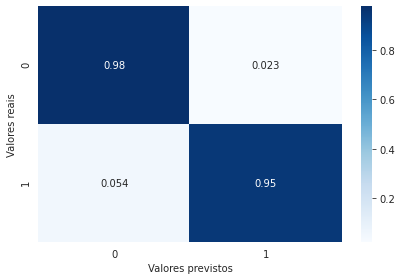

In [ ]:
# avaliando o desempenho do modelo com dados desconhecidos
print(f'Relatório de classificação:\n{classification_report(y_test, y_pred_test, digits=4)}')

# avaliando AUC do modelo
print("AUC ROC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_test)))

# matriz de confusão
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred_test, normalize='true'), cmap='Blues', annot=True, ax=ax)

ax.set_ylabel("Valores reais")
ax.set_xlabel("Valores previstos")

plt.tight_layout()

Notamos um desempenho similar com o apresentado em nosso conjunto de validação, portanto nosso modelo é, aparentemente, genérico o suficiente para dados desconhecidos.

## Conclusão

Nessa análise comparamos o desempenho de dois modelos de classificação baseados em algoritmos diferentes - Regressão Logística e Árvore de Decisão - aplicados ao cenário de detecção de fraudes em transações de cartão de crédito utilizando um mesmo conjunto de dados.

Com exceção do parâmetro `criterion` da árvore de decisão, ambos os modelos foram treinados utilizando os parâmetros padrão.

Se considerarmos apenas o `recall` e o `AUC ROC` podemos resumir nossa comparação na tabela abaixo:

<table>
  <caption>Comparativo de desempenho dos Modelos</captio>
  <thead>
    <tr>
      <th>Modelo</th>
      <th>Dataset</th>
      <th>AUC ROC</th>
      <th>Recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Regressão Logística</td>
      <td>Desbalanceado</td>
      <td>80.94%</td>
      <td>61.90%</td>
    </tr>
      <tr>
      <td>Regressão Logística</td>
      <td>Balanceados Under-Sampling</td>
      <td>93.11%</td>
      <td>90.48%</td>
    </tr>
      <tr>
      <td>Regressão Logística</td>
      <td>Balanceado Over-Sampling</td>
      <td>95.00%</td>
      <td>92.38%</td>
    </tr>
      <tr>
      <td>Árvore de Decisão</td>
      <td>Desbalanceado</td>
      <td>87.59%</td>
      <td>75.24%</td>
    </tr>
      <tr>
      <td>Árvore de Decisão</td>
      <td>Balanceado Under-Sampling</td>
      <td>90.88%</td>
      <td>94.29%</td>
    </tr>
      <tr>
      <td>Árvore de Decisão</td>
      <td>Balanceado Over-Sampling</td>
      <td>87.13%</td>
      <td>74.29%</td>
    </tr>
  </tbody>
</table>


A tabela acima nos revela algumas características importantes com relação ao nosso cenário (problema e dados):
1. O algoritmo de regressão logística apresentou melhor desempenho com o *dataset* balanceado através da técnica de *over-sampling* (com um maior volume de amostras).
2. O algoritmo de árvore de decisão apresentou melhor desempenho em relação a taxa de acertos de transações fraudulentas (`recall`), quando treinado utilizando um dataset balanceados com *under-sampling* (menor volume de amostras).

No cenário de detecção de fraudes em cartão de crédito esperamos obter: menor número de falsos positivos (experiência do cliente) e menor número de falsos negativos (segurança da institução e do cliente). O modelo recomendado para esse cenário é o de **Regressão Logística** treinado com o *dataset* balanceado com *over-sampling*.

Essa análise nos mostrou que foi possível melhorar o desempenho dos modelos de Machine Learning apenas com o tratamento adequado nos dados, não foi necessário o desenvolvimento de um novo algoritmo nem a parametrização dos mesmos para atingir resultados satisfatórios.

No entanto um bom *tunning* nos parâmetros, aliado a um bom conjunto de dados podemos obter modelos cada vez mais precisos.